In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
import numpy as np

In [9]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import models

In [13]:
input_img = Input(shape=(28, 28, 1))

encode1 = Conv2D(8, (3,3), activation='relu', padding='same')(input_img)
encode2 = MaxPooling2D((2,2), padding='same')(encode1)
encode3 = Conv2D(4, (3,3), activation='relu', padding='same')(encode2)
encode4 = MaxPooling2D((2,2), padding='same')(encode3)
encode5 = Conv2D(4, (3,3), activation='relu', padding='same')(encode4)
encode6 = MaxPooling2D((2,2), padding='same')(encode5)

decode1 = Conv2D(4, (3,3), activation='relu', padding='same')(encode6)
decode2  = UpSampling2D((2,2))(decode1)
decode3 = Conv2D(4, (3,3), activation='relu', padding='same')(decode2)
decode4  = UpSampling2D((2,2))(decode3)
decode5 = Conv2D(8, (3,3), activation='relu')(decode4)
decode6  = UpSampling2D((2,2))(decode5)
decode7  = Conv2D(1, (3,3), activation='relu', padding='same')(decode6)

model = models.Model(input_img, decode7)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 4)           148       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 4)           0   

In [14]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')
history = model.fit(x_train, x_train, batch_size=128, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 86us/step - loss: 3505.3407
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 2622.5616
Epoch 3/50
60000/60000 [==============================] - 3s 56us/step - loss: 2344.7373
Epoch 4/50
60000/60000 [==============================] - 3s 58us/step - loss: 2197.8161
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 2095.4291
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 2014.5407
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 1949.5635
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 1895.5313
Epoch 9/50
60000/60000 [==============================] - 4s 61us/step - loss: 1848.0377
Epoch 10/50
60000/60000 [==============================] - 4s 60us/step - loss: 1809.5714
Epoch 11/50
60000/60000 [==============================] - 3s 57us/step - loss: 1775.4684
Epoch 12/50
60000/6

In [16]:
ae_output = model.predict(x_test).reshape((10000, 28, 28))

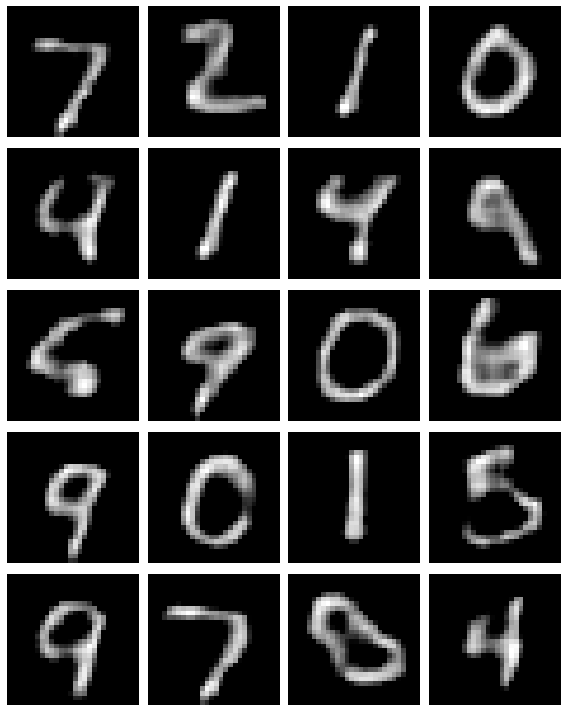

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

ROW = 5
COLUMN = 4

x = ae_output

fig, axes = plt.subplots(nrows=ROW, ncols=COLUMN, figsize=(8, 10))
for ax, i in zip(axes.flat, np.arange(ROW*COLUMN)):
    image = x[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()